# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

**(1) Is the distribution of body temperatures normal?**

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [281]:
# Examine the structure of the data
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [282]:
# Seperate out the temperature column from the rest of the data
temperature = df['temperature']
temperature.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [283]:
# Compute number of data points: n_data
n_data = len(temperature)
print(n_data)

130


In [284]:
# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)
print(n_bins)

11.40175425099138


In [285]:
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

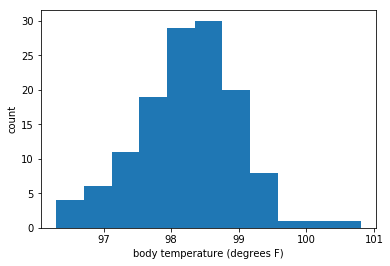

In [286]:
# Plot the histogram
plt.hist(temperature, bins = n_bins)

# Label axes
plt.xlabel('body temperature (degrees F)')
plt.ylabel('count')

# Show histogram
plt.show()

After plotting a histogram of the temperature data it does appear that the distribution of body temperatures appears normal. However, comparing the histogram to a theoretical nomral PDF suffers from binning bias so it is better to compare the ECDF of the data with to the theoretical CDF of a normal distribution. 

In [287]:
# Create a function to calculate the ECDF: ecdf() 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

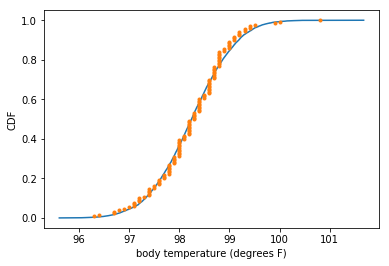

In [288]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(temperature)
sigma = np.std(temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x , y = ecdf(temperature)

# Plot the CDFs and show the plot
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('body temperature (degrees F)')
plt.ylabel('CDF')
plt.show()

After comparing the the ECDF of the data with to the theoretical CDF of a normal distribution we see, with much greater confidence, that the distribution is, indeed, normal.

**(2) Is the sample size large? Are the observations independent?**



**(3) Is the true population mean really 98.6 degrees F?**

**First, try a bootstrap hypothesis test.**

In [289]:
# Define the 1-dimensional bootstrap replicate function: bootstrap_replicate_1d
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Define the bootstrap reps function: draw_bs_reps
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Define the mean we want to test
hypothetical_mean = 98.6

# Make an array of translated temperatures: translated_temperature
translated_temperature = temperature - np.mean(temperature) + hypothetical_mean

# Take 10,000 bootstrap replicates of the temperature data's translated temperature values: bs_replicates
bs_replicates = draw_bs_reps(translated_temperature, np.mean, 10000)

# Compute fraction of replicates that were less than or equal to the sample mean temperatues: p
p = np.sum(bs_replicates <= np.mean(temperature)) / len(bs_replicates)

# Print the p-value
print('p = ', p)

p =  0.0


No, it does not appear that the true population mean is 98.6 degrees F. We calculated the probability of getting a mean temperature less than or equal to what was observed, given the assumption the true mean is 98.6 degrees F. The probability was extremely unlikely - not one observed instance in 10,000 trials - indicating that it is extremely unlikely that the true population mean is 98.6 degrees F.

**Now, let's try frequentist statistical testing.** 

**Would you use a one-sample or two-sample test?** 

one-sample test

**Why?**

A one-sample test compares a sample parameter to a population parameter in order to estimate, with a certain degrees of confidence, what the true population parameter is. A two-sample test compares differences between samples to determine, with a certain degree of confidence, whether they are similar or different. 

In this case, we wish to compare our sample paramater (mean temperature in degrees F) with a hypothesized population parameter (that the true population mean temperature is 98.6 degrees F), which is exactly what a one-sample test is designed to do.

**In this situation, is it appropriate to use the  t or  z statistic?**

The t-statistic is appropriate in this case because we do not know the standard deviation of the population we are sampling from. In such cases, it is tempting to simply substitute our sample standard deviation for the population standard deviation, but in so doing we will underestimate the actual confidence interval.

Under conditions like this (where the population standard deviation is unknown), statisticians instead use the t-statistic, whereby the functional difference is that utilizing a t-table instead of a z-table will give us the confidence interval that actually has the level of confidence that we want.

In [290]:
# Estimate the upper and lower bounds of a 95% confidence interval using a one-sample t-statistic
sample_mean = np.mean(temperature)
t_star = 1.9785
sample_sd = np.std(temperature)
n = len(temperature)

plus = sample_mean + t_star * (sample_sd / np.sqrt(n))
minus = sample_mean - t_star * (sample_sd / np.sqrt(n))

print(t_star * (sample_sd / np.sqrt(n)))

print('The upper bound of our 95% confidence interval is ' + str(plus) + ' degrees F')
print('The lower bound of our 95% confidence interval is ' + str(minus) + ' degrees F')

0.12673601217444005
The upper bound of our 95% confidence interval is 98.37596678140521 degrees F
The lower bound of our 95% confidence interval is 98.12249475705634 degrees F


The null hypothesis of frequentist statistical test is that the true population mean is 98.6 degrees F. After performing our one sample t-statistic we estimated with 95% confidence that the true population mean is between ~98.4 degrees F and ~98.1 degrees F. Since the null hypothesis is outside of that range, we can reject, with 95% confidence, the null hypothesis that the true population mean is 98.6 degrees F.

**Now try using the other test.** 

In [291]:
# Estimate the upper and lower bounds of a 95% confidence interval using a one-sample z-statistic
z_star = 1.96

plus = sample_mean + z_star * (sample_sd / np.sqrt(n))
minus = sample_mean - z_star * (sample_sd / np.sqrt(n))

print('The upper bound of our 95% confidence interval is ' + str(plus) + ' degrees F')
print('The lower bound of our 95% confidence interval is ' + str(minus) + ' degrees F')

The upper bound of our 95% confidence interval is 98.37478173403336 degrees F
The lower bound of our 95% confidence interval is 98.12367980442819 degrees F


**How is the result different? Why?**

As stated, above, when we substitute the sample standard deviation for the population standard deviation we underestimate the actual confidence interval. In this case the difference isn't that pronounced, but in other situations where extreme accuracy is need, the z-statistic simply won't be as accurate as needed. 

**(4) Draw a small sample of size 10 from the data and repeat both frequentist tests.** 

In [292]:
sample_data = np.random.choice(temperature, 10)

**Which one is the correct one to use?**

Since we can estimate the population standard deviation we should use the z-statistic.

In [293]:
# Estimate the upper and lower bounds of a 95% confidence interval using a one-sample z-statistic of our new sample

sample_mean = np.mean(sample_data)
population_sd = np.std(temperature)
n = len(sample_data)

plus = sample_mean + z_star * (population_sd / np.sqrt(n))
minus = sample_mean - z_star * (population_sd / np.sqrt(n))

print('The upper bound of our 95% confidence interval is ' + str(plus) + ' degrees F')
print('The lower bound of our 95% confidence interval is ' + str(minus) + ' degrees F')

The upper bound of our 95% confidence interval is 98.77268044127966 degrees F
The lower bound of our 95% confidence interval is 97.86731955872033 degrees F


In [294]:
# Estimate the upper and lower bounds of a 95% confidence interval using a one-sample t-statistic of our new sample
sample_sd = np.std(sample_data)

plus = sample_mean + t_star * (population_sd / np.sqrt(n))
minus = sample_mean - t_star * (population_sd / np.sqrt(n))

print('The upper bound of our 95% confidence interval is ' + str(plus) + ' degrees F')
print('The lower bound of our 95% confidence interval is ' + str(minus) + ' degrees F')

The upper bound of our 95% confidence interval is 98.77695319034277 degrees F
The lower bound of our 95% confidence interval is 97.86304680965722 degrees F


**What do you notice?** 

The t-statistic overestimates the confidence interval

**What does this tell you about the difference in application of the t and  z statistic?**

When we know the population standard deviation we get more accurate results using the z-statistics; when we do not know the population standard deviation we get more accurate results using the t-statistic.

**(5) At what temperature should we consider someone's temperature to be "abnormal"?**

**As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.**

**Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.**

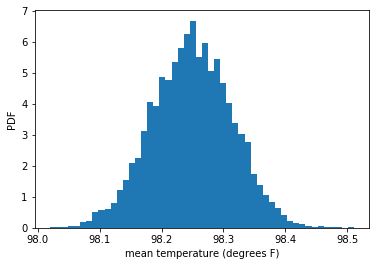

In [295]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(temperature, np.mean, 10000)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean temperature (degrees F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [296]:
bs_confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])
print(bs_confidence_interval)

[98.12153846 98.37461538]


In [297]:
bs_margin_of_error = t_star * np.std(bs_replicates)
print(bs_margin_of_error)

0.1275049809471907


Using the bootstrap method we were able to determine a confidence interval and a margin of error. The boostrapped 95% confidence interval was between ~98.13 and ~98.38 degrees F, meaning that we are 95% confident that the true population mean is between ~98.13 degrees F and ~98.38 degrees F.

The bootstrapped margin of error was calculated be determining the standard deviation of the bootstrapped replicates and then multiplying them by the appropriate t-statistic (which was previously determined when we answered the frequentist section of question 3. The boostrapped margin of error was determined to be ~0.13 degrees F, meaning that we are 95% confident that the true population mean is within ~0.13 degrees F of the sample mean.

In terms of abnormal temperature, using the boostrapped meathod we are reasonably assured that an abnormal temperature is either less than ~98.13 degrees F or greater than ~98.38 degrees F.

We have already implemented the frequentist approach in questions 3, and it was determined that the upper bound of our 95% confidence interval was ~98.38 degrees F and the lower bound of our 95% confidence interval was 98.12 degrees F, meaning that we are 95% confident that the true population mean is between ~98.12 degrees F and ~98.36 degrees F.

Additionally, we were able to determine the margin of error, which was simply our t_star value multiplied by (sample_sd / np.sqrt(n)),  or ~0.13 degrees F, nearly identical to our bootstrapped margin of error.

Therefore, like with our bootsrap method, our frequentist methods indicate abnormal temperatures to be below ~98.12 degrees F and above ~98.38 degrees F.

**(6) Is there a significant difference between males and females in normal temperature?**

female mean body temperature: 98.39384615384613
male mean body temperature: 98.1046153846154


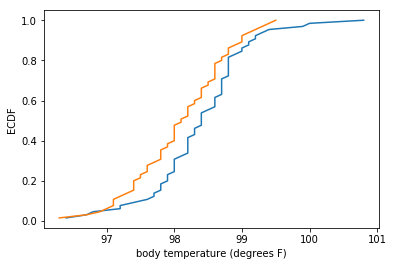

In [298]:
# Separate out the female temperatures: female_temperature
female_temperature = df['gender'] == 'F'
female_temperature = df[female_temperature]
female_temperature = female_temperature['temperature']
print('female mean body temperature: ' + str(np.mean(female_temperature)))

# Separate out the male temperatures: male_temperature
male_temperature = df['gender'] == 'M'
male_temperature = df[male_temperature]
male_temperature = male_temperature['temperature']
print('male mean body temperature: ' + str(np.mean(male_temperature)))

# Perform some EDA on the two temperature fields by comparing their ECDFs
x_female, y_female = ecdf(female_temperature)
x_male, y_male = ecdf(male_temperature)

plt.plot(x_female, y_female)
plt.plot(x_male, y_male)
plt.xlabel('body temperature (degrees F)')
plt.ylabel('ECDF')
plt.show()

From a cursory look at the ECDFs it appears that there is a difference in the distribution of temperatures in females versus males, with males having a slightly lower mean body temperature than females. However, to verify this we should perform some additional statistical testing. First, we will perform some permutation sampling, a great way to simulate the hypothesis that two variables have identical probability distributions.

In [299]:
# Define a permutation sample function: permutation_sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Define a permuatation replicate function: draw_perm_reps 
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Define a function that calculates the difference in means: diff_of_means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Calculate the empirical difference in means between male and female temperatures: empirical_diff_means
empirical_diff_means = diff_of_means(female_temperature, male_temperature)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(female_temperature, male_temperature, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0105


It does, indeed, appear that there is a statistically significant difference in mean body temperatures between men and women. Just to make sure, let's now perform a two-sample bootstrap hypothesis test for difference of means test.

We now want to test the hypothesis that male body temperatures and female body temperatures have the same mean temperature, but not necessarily the same distribution, which is impossible with our previous permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [300]:
# Compute mean of all forces: mean_force
mean_force = np.mean(temperature)

# Generate shifted arrays
female_temperature_shifted = female_temperature - np.mean(female_temperature) + mean_force
male_temperature_shifted = male_temperature - np.mean(male_temperature) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_female = draw_bs_reps(female_temperature_shifted, np.mean, size=10000)
bs_replicates_male = draw_bs_reps(male_temperature_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_female - bs_replicates_male

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0114


Again, we get very smilar results. It definitely appears that there is a statistically significant difference between male and female mean body temperatures, with men having a slightly lower body temperature than women.